In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.remove('not')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>


False

In [5]:
 df=pd.read_csv('gaziyabad.csv')

In [7]:
df=df[df['content'].str.len()>200]

In [6]:
df.head(10)

,Unnamed: 0,date,content
0,0,2022-11-01 15:46:59+00:00,BIG: 3 Hybrid Terrorist arrested with 10kg IED...
1,1,2022-11-01 15:41:16+00:00,Requested urgent intervention of Union Ministe...
2,2,2022-11-01 15:27:01+00:00,"@SpareSidekick ""I am sorry but i am not in moo..."
3,3,2022-11-01 15:25:08+00:00,@DrTejaswini07 Attack the views. Not the person.
4,4,2022-11-01 15:20:43+00:00,Scientists have their eyes on several Deltacro...
5,5,2022-11-01 15:17:40+00:00,@BBCBreaking Police explore motives of bomber ...
6,6,2022-11-01 15:16:29+00:00,@BBCBreaking Police urged to treat Dover attac...
7,7,2022-11-01 14:53:25+00:00,"@AamAadmiParty Ankit Tyagi, the reporter in vi..."
8,8,2022-11-01 14:46:52+00:00,@cric_Fadyy @reddysaab__ @SajSadiqCricket Worl...
9,9,2022-11-01 14:43:15+00:00,Is this the same Ankit Tyagi in this video who...


In [7]:
 df=df.drop('Unnamed: 0',axis=1)

In [8]:
def preprocess_text(text):
    text=text.lower()
    #remove urls
    text=re.sub(r"http\S+|www\S+|https\S+", "",text,flags=re.MULTILINE)
    text=text.translate(str.maketrans("", "",string.punctuation))
    text=re.sub(r'\@\w+|\#', "",text)
    text_tokens=word_tokenize(text)
    fil_words=[word for word in text_tokens if word not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stem_words=[ps.stem(w) for w in fil_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lem_words=[lemmatizer.lemmatize(w, pos='a') for w in stem_words]
    
    return " ".join(lem_words)

In [9]:
df['clean']=df['content'].apply(preprocess_text);

In [10]:
from textblob import TextBlob
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet['TextBlob_Subjectivity'] = tweet['clean'].apply(getSubjectivity)
 tweet['TextBlob_Polarity'] = tweet['clean'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet ['TextBlob_Analysis'] = tweet  ['TextBlob_Polarity'].apply(getAnalysis )
 return tweet

dfnew=sentiment_analysis(df)

In [11]:
dfnew

,date,content,clean,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,2022-11-01 15:46:59+00:00,BIG: 3 Hybrid Terrorist arrested with 10kg IED...,big 3 hybrid terrorist arrest 10kg i plan atta...,0.050000,-0.025000,Negative
1,2022-11-01 15:41:16+00:00,Requested urgent intervention of Union Ministe...,request urgent intervent union minist educ shr...,0.694444,0.500000,Positive
2,2022-11-01 15:27:01+00:00,"@SpareSidekick ""I am sorry but i am not in moo...",sparesidekick sorri not mood carol food attack...,0.000000,0.000000,Neutral
3,2022-11-01 15:25:08+00:00,@DrTejaswini07 Attack the views. Not the person.,drtejaswini07 attack view not person,0.000000,0.000000,Neutral
4,2022-11-01 15:20:43+00:00,Scientists have their eyes on several Deltacro...,scientist eye sever deltacrons—new covid varia...,0.454545,0.136364,Positive
...,...,...,...,...,...,...
995,2022-10-27 16:40:11+00:00,@annamalai_k Looks like aadu annamalai knew th...,annamalaik look like aadu annamalai knew alrea...,0.000000,0.000000,Neutral
996,2022-10-27 16:39:50+00:00,@RanaAyyub @khanumarfa @_sayema @_sabanaqvi ye...,ranaayyub khanumarfa sayema sabanaqvi ye jo jy...,0.491667,0.258333,Positive
997,2022-10-27 16:38:00+00:00,@TheRealPCB #Pakistan with World's top T20I an...,therealpcb pakistan world top t20i fieri fast ...,0.566667,0.100000,Positive
998,2022-10-27 16:29:56+00:00,"Terrorist attack: Don’t travel to Abuja, UK wa...",terrorist attack ’ travel abuja uk warn britis...,0.000000,0.000000,Neutral


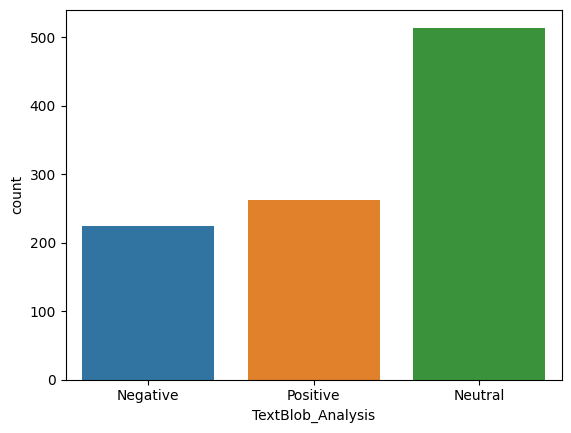

In [12]:
sns.countplot(x=dfnew.TextBlob_Analysis)
plt.show()

In [13]:
def get_n_grams(text,low_n,high_n,top_number):
    
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

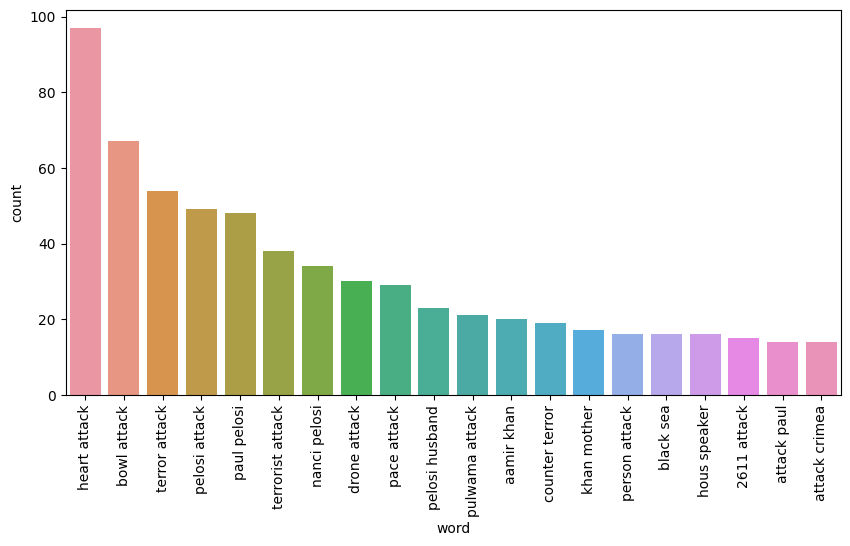

,word,count
0,heart attack,97
1,bowl attack,67
2,terror attack,54
3,pelosi attack,49
4,paul pelosi,48
5,terrorist attack,38
6,nanci pelosi,34
7,drone attack,30
8,pace attack,29
9,pelosi husband,23


In [14]:
get_n_grams(df.clean,2,2,20)